# <b><center>Importing Libraries</b></center>

In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import math
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
import sklearn.linear_model as lm
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from statsmodels.formula.api import ols
from sklearn.model_selection import KFold
import xgboost as xgb
import warnings
sns.set_style('darkgrid')
#Importing all the libraries

# <b><center>Spotify Playlist Dataset</b></center>

In [3]:
s_data=pd.read_csv('Spotify Playlist-Clean_v2.csv',encoding='ISO-8859-1')
#s_data.head(20)
s_data
#reading the dataset Spotify Playlist-Clean_v2.csv

,artists,name,id,popularity,release_date,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,44,When Your Heart Stops Beating,1VpTwecl7EbQiGyVsvwFQE,53.0,01/01/06,2006.0,0.000367,0.416,192787.0,0.967,1.0,0.000000,9.0,0.0632,-2.289,0.0,0.1090,171.032,0.431
1,44,Baby Come On,6Bcf5qj1eeHGjSiRc3eD3X,41.0,01/01/06,2006.0,0.047000,0.525,166093.0,0.920,1.0,0.000000,2.0,0.3730,-4.714,1.0,0.0615,165.391,0.602
2,44,Make You Smile,64ojb7llTMzvdkHdbIpq3y,41.0,01/01/06,2006.0,0.003860,0.503,224587.0,0.657,0.0,0.000010,2.0,0.1050,-7.667,1.0,0.0378,169.001,0.152
3,44,Lycanthrope,1g5CHtsDQl7KVWaUiAwat0,40.0,01/01/06,2006.0,0.000039,0.362,237533.0,0.989,1.0,0.000000,9.0,0.0616,-2.377,0.0,0.1080,168.061,0.380
4,65,The Life I Live,3OIkkAEms45BnfkSKgRu6k,32.0,01/01/66,1966.0,0.148000,0.573,201533.0,0.515,0.0,0.000086,4.0,0.1740,-10.059,1.0,0.0447,131.240,0.778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166848,ZZ Top,Squank,5ndUXJQPTVDPVlQUgW2vgE,34.0,01/16/70,1970.0,0.571000,0.846,168653.0,0.304,0.0,0.157000,0.0,0.1020,-12.683,1.0,0.0536,98.323,0.962
166849,ZZ Top,Certified Blues,7mdPXhJBfxJBonEmqZvm9t,33.0,01/16/70,1970.0,0.417000,0.674,207707.0,0.397,0.0,0.017700,4.0,0.1340,-11.826,0.0,0.0281,97.413,0.845
166850,ZZ Top,Backdoor Love Affair,7w83TSpDeFsL8dV9pAHWn6,33.0,01/16/70,1970.0,0.107000,0.635,199907.0,0.645,0.0,0.094900,4.0,0.1010,-11.124,0.0,0.0343,105.355,0.589
166851,ZZ Top,Bedroom Thang,23dC4zCpB1bnLzBxAXDLD7,33.0,01/16/70,1970.0,0.187000,0.466,279840.0,0.406,0.0,0.671000,7.0,0.1050,-13.378,1.0,0.0539,148.598,0.770


In [4]:
s_data=s_data.dropna()
s_data.isna().sum()
#getting rid of n/a

artists             0
name                0
id                  0
popularity          0
release_date        0
year                0
acousticness        0
danceability        0
duration_ms         0
energy              0
explicit            0
instrumentalness    0
key                 0
liveness            0
loudness            0
mode                0
speechiness         0
tempo               0
valence             0
dtype: int64

In [5]:
s_data.describe()

,popularity,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
count,166852.000000,166852.000000,166852.000000,166852.000000,1.668520e+05,166852.000000,166852.000000,166852.000000,166852.000000,166852.000000,166852.000000,166852.000000,166852.000000,166852.000000,166852.000000
mean,32.071902,1977.871862,0.493379,0.537268,2.326563e+05,0.494054,0.074449,0.161063,5.202521,0.205867,-11.228271,0.709761,0.084511,117.126609,0.532875
std,21.397591,25.293913,0.376704,0.175306,1.211667e+05,0.266168,0.262501,0.307943,3.508185,0.176830,5.589240,0.453874,0.120851,30.686051,0.263032
min,0.000000,1921.000000,0.000000,0.000000,5.108000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,-60.000000,0.000000,0.000000,0.000000,0.000000
25%,14.000000,1958.000000,0.093400,0.417000,1.724795e+05,0.271000,0.000000,0.000000,2.000000,0.098100,-14.219000,0.000000,0.034800,93.810500,0.322000
50%,34.000000,1979.000000,0.495000,0.546000,2.094930e+05,0.488000,0.000000,0.000219,5.000000,0.135000,-10.357000,1.000000,0.044800,114.969000,0.544000
75%,48.000000,1999.000000,0.887000,0.665000,2.635898e+05,0.714000,0.000000,0.087000,8.000000,0.260000,-7.066000,1.000000,0.073400,135.887000,0.752000
max,100.000000,2020.000000,0.996000,0.988000,5.403500e+06,1.000000,1.000000,1.000000,11.000000,1.000000,3.855000,1.000000,0.968000,244.091000,1.000000


# <b><center>Taking Out Any Year Greater Than 2019</b></center>

In [6]:
s_data2 = s_data[s_data['year'] <= 2019]
s_data2
#excluding the year 2020 from our dataset since we are not done with the year yet

,artists,name,id,popularity,release_date,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence
0,44,When Your Heart Stops Beating,1VpTwecl7EbQiGyVsvwFQE,53.0,01/01/06,2006.0,0.000367,0.416,192787.0,0.967,1.0,0.000000,9.0,0.0632,-2.289,0.0,0.1090,171.032,0.431
1,44,Baby Come On,6Bcf5qj1eeHGjSiRc3eD3X,41.0,01/01/06,2006.0,0.047000,0.525,166093.0,0.920,1.0,0.000000,2.0,0.3730,-4.714,1.0,0.0615,165.391,0.602
2,44,Make You Smile,64ojb7llTMzvdkHdbIpq3y,41.0,01/01/06,2006.0,0.003860,0.503,224587.0,0.657,0.0,0.000010,2.0,0.1050,-7.667,1.0,0.0378,169.001,0.152
3,44,Lycanthrope,1g5CHtsDQl7KVWaUiAwat0,40.0,01/01/06,2006.0,0.000039,0.362,237533.0,0.989,1.0,0.000000,9.0,0.0616,-2.377,0.0,0.1080,168.061,0.380
4,65,The Life I Live,3OIkkAEms45BnfkSKgRu6k,32.0,01/01/66,1966.0,0.148000,0.573,201533.0,0.515,0.0,0.000086,4.0,0.1740,-10.059,1.0,0.0447,131.240,0.778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166848,ZZ Top,Squank,5ndUXJQPTVDPVlQUgW2vgE,34.0,01/16/70,1970.0,0.571000,0.846,168653.0,0.304,0.0,0.157000,0.0,0.1020,-12.683,1.0,0.0536,98.323,0.962
166849,ZZ Top,Certified Blues,7mdPXhJBfxJBonEmqZvm9t,33.0,01/16/70,1970.0,0.417000,0.674,207707.0,0.397,0.0,0.017700,4.0,0.1340,-11.826,0.0,0.0281,97.413,0.845
166850,ZZ Top,Backdoor Love Affair,7w83TSpDeFsL8dV9pAHWn6,33.0,01/16/70,1970.0,0.107000,0.635,199907.0,0.645,0.0,0.094900,4.0,0.1010,-11.124,0.0,0.0343,105.355,0.589
166851,ZZ Top,Bedroom Thang,23dC4zCpB1bnLzBxAXDLD7,33.0,01/16/70,1970.0,0.187000,0.466,279840.0,0.406,0.0,0.671000,7.0,0.1050,-13.378,1.0,0.0539,148.598,0.770


In [7]:
s_data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 165096 entries, 0 to 166852
Data columns (total 19 columns):
artists             165096 non-null object
name                165096 non-null object
id                  165096 non-null object
popularity          165096 non-null float64
release_date        165096 non-null object
year                165096 non-null float64
acousticness        165096 non-null float64
danceability        165096 non-null float64
duration_ms         165096 non-null float64
energy              165096 non-null float64
explicit            165096 non-null float64
instrumentalness    165096 non-null float64
key                 165096 non-null float64
liveness            165096 non-null float64
loudness            165096 non-null float64
mode                165096 non-null float64
speechiness         165096 non-null float64
tempo               165096 non-null float64
valence             165096 non-null float64
dtypes: float64(15), object(4)
memory usage: 25.2+ MB


# <b><center>A Count on Unique Artists</b></center>

In [8]:
number_of_unique_artists = len(s_data2['artists'].value_counts().to_list())
number_of_unique_artists
#count on unique artists

30605

# <b><center>Most Hits Per Artist in Decending Order</b></center>

In [9]:
s_data2.groupby('artists')['popularity'].count().sort_values(ascending=False).head(20)
#group the dataset by artist and get a count on the amount of songs each has

artists
Francisco Canaro                      938
Ignacio Corsini                       620
Frank Sinatra                         592
Bob Dylan                             539
The Rolling Stones                    512
Johnny Cash                           502
The Beach Boys                        491
Elvis Presley                         488
Francisco Canaro  Charlo              466
Queen                                 426
Dean Martin                           411
The Beatles                           410
Miles Davis                           408
Billie Holiday                        400
Fleetwood Mac                         398
Ella Fitzgerald                       354
Lead Belly                            339
Led Zeppelin                          338
Johann Sebastian Bach  Glenn Gould    325
Lata Mangeshkar                       319
Name: popularity, dtype: int64

In [10]:
popular_artists = s_data2.groupby('artists')['popularity'].count().sort_values(ascending=False).head(10)
popular_artists
#group the dataset by artist and get a count on the amount of songs each has

artists
Francisco Canaro            938
Ignacio Corsini             620
Frank Sinatra               592
Bob Dylan                   539
The Rolling Stones          512
Johnny Cash                 502
The Beach Boys              491
Elvis Presley               488
Francisco Canaro  Charlo    466
Queen                       426
Name: popularity, dtype: int64

In [11]:
popular_artists.describe

<bound method NDFrame.describe of artists
Francisco Canaro            938
Ignacio Corsini             620
Frank Sinatra               592
Bob Dylan                   539
The Rolling Stones          512
Johnny Cash                 502
The Beach Boys              491
Elvis Presley               488
Francisco Canaro  Charlo    466
Queen                       426
Name: popularity, dtype: int64>

# <b><center> Most Hits by An Artist </b></center>

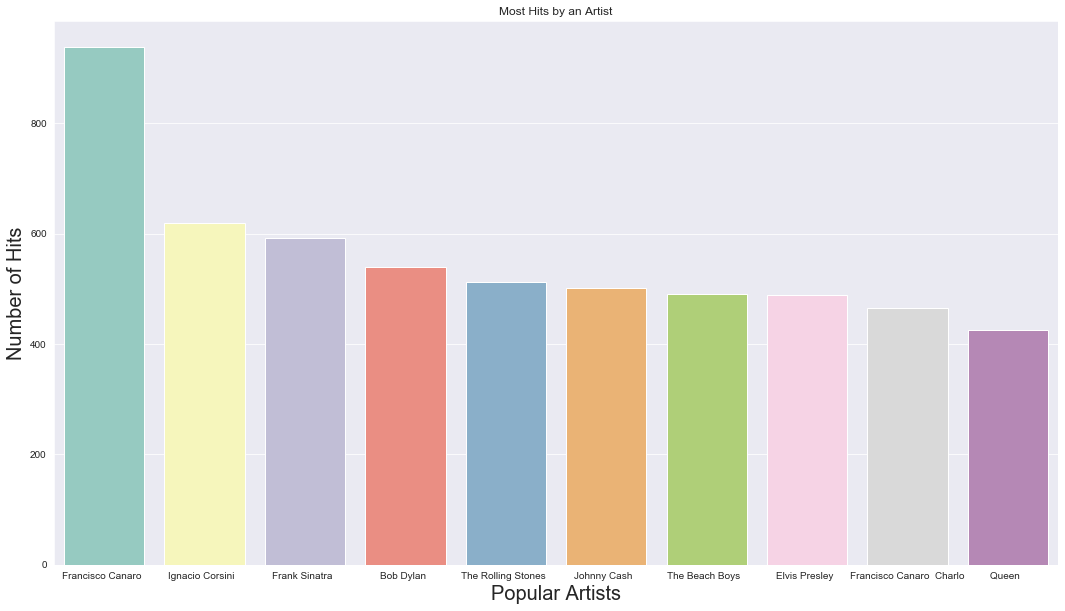

In [12]:
plt.figure(figsize=(18,10))
ax = sns.barplot(y=popular_artists, x=popular_artists.index, palette="Set3")
ax.set_title('Most Hits by an Artist', fontsize=12)
ax.set_xlabel('Popular Artists', fontsize=20)
ax.set_ylabel('Number of Hits', fontsize=20)
plt.savefig('Hit byt month.png',dpi=300, bbox_inches='tight')
#running a barplot graph to see the top hits by artist

In [13]:
s_data2.groupby('artists')['popularity'].mean().head(10)
#group the dataset by the artist and then calculate the mean of the polarity

artists
$NOT                          65.000000
$NOT  SUS Valentino           59.000000
$NOT  Wifisfuneral            61.000000
$uicideBoy$                   60.804348
$uicideBoy$  Denzel Curry     60.000000
$uicideBoy$  Germ             60.500000
$uicideBoy$  Pouya            60.500000
$uicideBoy$  Shakewell        62.000000
$uicideBoy$  Travis Barker    63.000000
(Hed) P.E.                    45.800000
Name: popularity, dtype: float64

# <b><center>Highest Rating Per Artist</b></center>

In [14]:
s_data2.groupby('artists')['popularity'].mean().sort_values(ascending=False).head(10)
#sort the artists in the descending order of their average popularity

artists
Surf Mesa  Emilee            95.0
BENEE  Gus Dapperton         95.0
KAROL G  Nicki Minaj         92.0
Topic  A7S                   92.0
Regard                       90.0
Billie Eilish  Khalid        89.0
JP Saxe  Julia Michaels      89.0
MEDUZA  Becky Hill           88.0
Black Eyed Peas  J Balvin    88.0
Mustard  Roddy Ricch         87.0
Name: popularity, dtype: float64

In [15]:
popularity_mean_count = pd.DataFrame(s_data2.groupby('artists')['popularity'].mean())
# create popularity_mean_count dataframe and first add the average popularity of each artists to this dataframe

In [16]:
popularity_mean_count['popularity_counts'] = pd.DataFrame(s_data2.groupby('artists')['popularity'].count())
#Next, we need to add the number of popularity for each artist to the popularity_mean_count dataframe. 

In [17]:
popularity_mean_count.head(20)
#artists, along with the average popularity and number of ratings for the artists.

,popularity,popularity_counts
artists,,
$NOT,65.000000,1
$NOT SUS Valentino,59.000000,1
$NOT Wifisfuneral,61.000000,1
$uicideBoy$,60.804348,46
$uicideBoy$ Denzel Curry,60.000000,1
$uicideBoy$ Germ,60.500000,2
$uicideBoy$ Pouya,60.500000,6
$uicideBoy$ Shakewell,62.000000,1
$uicideBoy$ Travis Barker,63.000000,1


In [18]:
sort_by_counts = popularity_mean_count.sort_values('popularity',ascending=False)
sort_by_counts.head(40)
#sorting the highest popularity

,popularity,popularity_counts
artists,,
Surf Mesa Emilee,95.000000,1
BENEE Gus Dapperton,95.000000,1
KAROL G Nicki Minaj,92.000000,1
Topic A7S,92.000000,1
Regard,90.000000,1
JP Saxe Julia Michaels,89.000000,1
Billie Eilish Khalid,89.000000,1
Black Eyed Peas J Balvin,88.000000,1
MEDUZA Becky Hill,88.000000,1


# <b><center>Most Popular Artist With More Than 50 Hit Songs</b></center>

In [19]:
s_data3 = sort_by_counts[sort_by_counts['popularity_counts'] >= 50]
s_data3.head(30)
#We want to see all artist with more than 50 hits and an average of their poplarity

,popularity,popularity_counts
artists,,
Twenty One Pilots,66.107143,56
BTS,65.271845,103
One Direction,65.195876,97
NF,64.868852,61
Ed Sheeran,64.844828,58
Drake,61.229508,122
J. Cole,61.209677,62
Rihanna,60.738462,65
Imagine Dragons,60.345455,55


In [20]:
import datetime as dt
s_data2['Date']= pd.to_datetime(s_data2['release_date'])
s_data2['month'] = s_data2['Date'].dt.month
s_data2.head(20)
#sort the artists in the descending order of their average popularity

C:\Users\Prince P\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Prince P\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,artists,name,id,popularity,release_date,year,acousticness,danceability,duration_ms,energy,...,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,Date,month
0,44,When Your Heart Stops Beating,1VpTwecl7EbQiGyVsvwFQE,53.0,01/01/06,2006.0,0.000367,0.416,192787.0,0.967,...,0.000000,9.0,0.0632,-2.289,0.0,0.1090,171.032,0.431,2006-01-01,1
1,44,Baby Come On,6Bcf5qj1eeHGjSiRc3eD3X,41.0,01/01/06,2006.0,0.047000,0.525,166093.0,0.920,...,0.000000,2.0,0.3730,-4.714,1.0,0.0615,165.391,0.602,2006-01-01,1
2,44,Make You Smile,64ojb7llTMzvdkHdbIpq3y,41.0,01/01/06,2006.0,0.003860,0.503,224587.0,0.657,...,0.000010,2.0,0.1050,-7.667,1.0,0.0378,169.001,0.152,2006-01-01,1
3,44,Lycanthrope,1g5CHtsDQl7KVWaUiAwat0,40.0,01/01/06,2006.0,0.000039,0.362,237533.0,0.989,...,0.000000,9.0,0.0616,-2.377,0.0,0.1080,168.061,0.380,2006-01-01,1
4,65,The Life I Live,3OIkkAEms45BnfkSKgRu6k,32.0,01/01/66,1966.0,0.148000,0.573,201533.0,0.515,...,0.000086,4.0,0.1740,-10.059,1.0,0.0447,131.240,0.778,2066-01-01,1
5,66,Mas Que Nada,6clrt5x5viq13LZwEnHcur,42.0,01/01/87,1987.0,0.566000,0.644,161307.0,0.483,...,0.000053,5.0,0.2440,-14.561,0.0,0.0443,88.622,0.841,1987-01-01,1
6,66,The Fool On The Hill,7384ZImepcCLSwbxmX1D2T,41.0,01/01/87,1987.0,0.839000,0.656,191533.0,0.272,...,0.001120,9.0,0.0654,-20.372,1.0,0.0348,123.806,0.775,1987-01-01,1
7,66,Going Out Of My Head,1Tt9cg5pgh57CxsiqgIh44,40.0,01/01/87,1987.0,0.804000,0.662,183627.0,0.231,...,0.000005,7.0,0.0944,-16.393,1.0,0.0426,122.747,0.601,1987-01-01,1
8,66,Mais Que Nada,6YTBfxkdGce9pLEy9jG9Jo,57.0,01/01/72,1972.0,0.524000,0.637,159467.0,0.493,...,0.000015,0.0,0.1360,-13.094,0.0,0.0482,88.796,0.932,1972-01-01,1
9,66,One Note Samba / Spanish Flea,2pryIzW17hFkcebKGWzDRR,40.0,01/01/72,1972.0,0.698000,0.596,107133.0,0.343,...,0.000000,2.0,0.0602,-14.793,1.0,0.1940,195.838,0.771,1972-01-01,1


# <b><center>Most Popular Month With The Most Hits</b></center>

In [21]:
popular_months = s_data2.groupby('month')['artists'].count()
popular_months
#bringing in the most hits per month

month
1     38494
2      4849
3      6534
4     16068
5     30390
6     20617
7      6843
8      6403
9      8082
10     8555
11     9207
12     9054
Name: artists, dtype: int64

In [22]:
popular_months.describe

<bound method NDFrame.describe of month
1     38494
2      4849
3      6534
4     16068
5     30390
6     20617
7      6843
8      6403
9      8082
10     8555
11     9207
12     9054
Name: artists, dtype: int64>

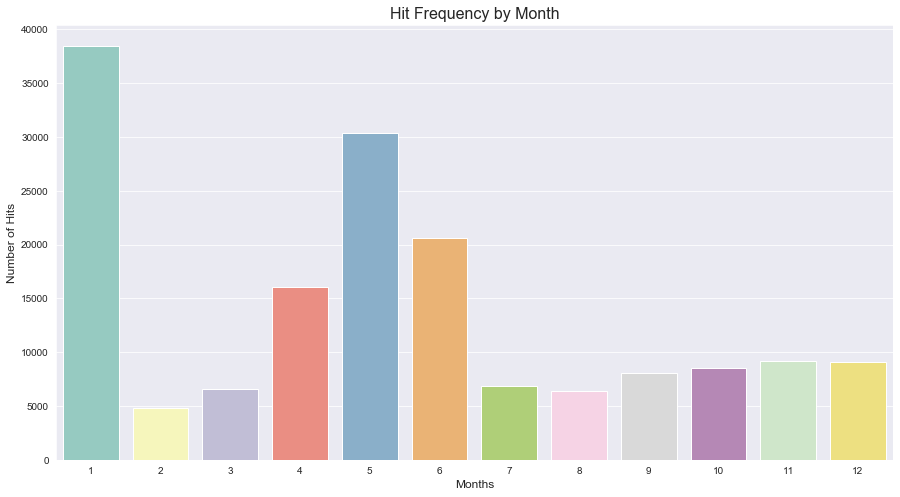

In [23]:
plt.figure(figsize=(15,8))
ax = sns.barplot(y=popular_months, x=popular_months.index, palette="Set3")
ax.set_title('Hit Frequency by Month', fontsize=16)
ax.set_xlabel('Months', fontsize=12)
ax.set_ylabel('Number of Hits', fontsize=12)
plt.savefig('Hit byt month.png',dpi=300, bbox_inches='tight')
#created a barplot graph to see which months have the highest hits

In [24]:
type(popular_months)

pandas.core.series.Series

# <b><center> Correlation </b></center>

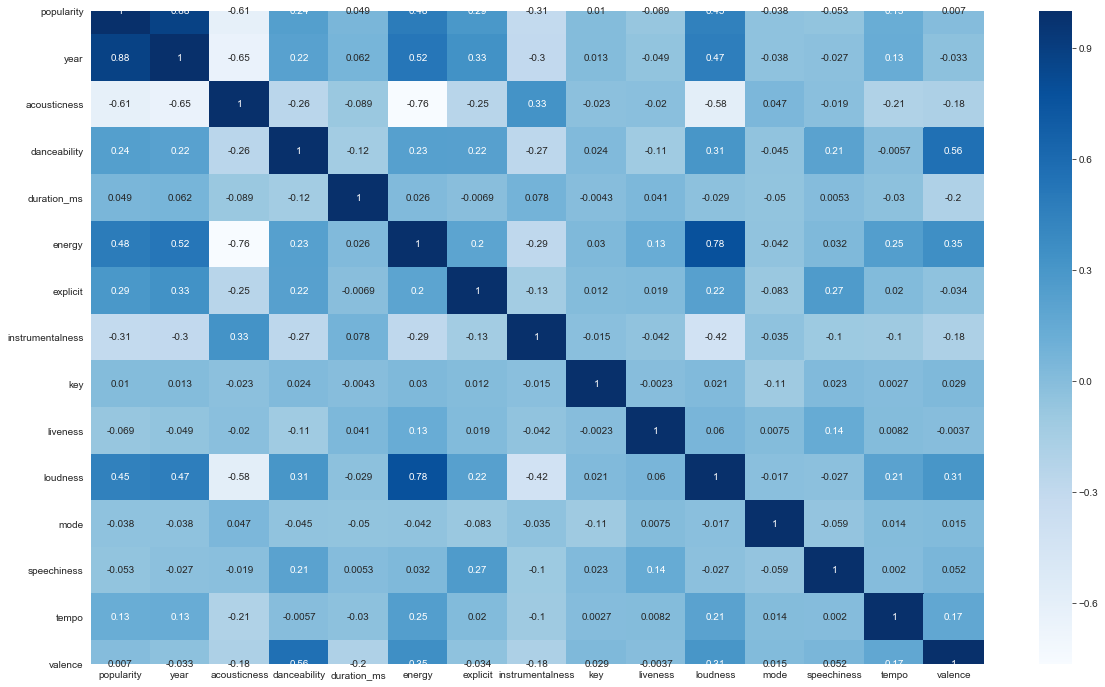

In [25]:
corrs = s_data.corr()
plt.figure(figsize=(20,12))
ax = sns.heatmap(corrs,cmap='Blues',annot=True)
#seeing the correlation 

# <b><center> Linear Regression Using The Normal Equation </b></center>

In [26]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
import sklearn.metrics as sklm
import sklearn.model_selection as ms
from sklearn.linear_model import SGDRegressor

from sklearn.datasets import make_regression
from matplotlib import pyplot
import xgboost as xgb
# xgboost for feature importance on a regression problem

In [27]:
year = 1970
stringyear = str(1970)
century = stringyear[:2] + "00"
century = int(century)
print (century)
decade = stringyear[2:]
decade = int(decade)
print (decade)

1900
70


In [28]:
1972-((int(1972/100)/100)*100)

1953.0

In [29]:
s_data['decade']=s_data['year'] - ((s_data['year']/100) * 100)
s_data

C:\Users\Prince P\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,artists,name,id,popularity,release_date,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,decade
0,44,When Your Heart Stops Beating,1VpTwecl7EbQiGyVsvwFQE,53.0,01/01/06,2006.0,0.000367,0.416,192787.0,0.967,1.0,0.000000,9.0,0.0632,-2.289,0.0,0.1090,171.032,0.431,2.273737e-13
1,44,Baby Come On,6Bcf5qj1eeHGjSiRc3eD3X,41.0,01/01/06,2006.0,0.047000,0.525,166093.0,0.920,1.0,0.000000,2.0,0.3730,-4.714,1.0,0.0615,165.391,0.602,2.273737e-13
2,44,Make You Smile,64ojb7llTMzvdkHdbIpq3y,41.0,01/01/06,2006.0,0.003860,0.503,224587.0,0.657,0.0,0.000010,2.0,0.1050,-7.667,1.0,0.0378,169.001,0.152,2.273737e-13
3,44,Lycanthrope,1g5CHtsDQl7KVWaUiAwat0,40.0,01/01/06,2006.0,0.000039,0.362,237533.0,0.989,1.0,0.000000,9.0,0.0616,-2.377,0.0,0.1080,168.061,0.380,2.273737e-13
4,65,The Life I Live,3OIkkAEms45BnfkSKgRu6k,32.0,01/01/66,1966.0,0.148000,0.573,201533.0,0.515,0.0,0.000086,4.0,0.1740,-10.059,1.0,0.0447,131.240,0.778,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166848,ZZ Top,Squank,5ndUXJQPTVDPVlQUgW2vgE,34.0,01/16/70,1970.0,0.571000,0.846,168653.0,0.304,0.0,0.157000,0.0,0.1020,-12.683,1.0,0.0536,98.323,0.962,0.000000e+00
166849,ZZ Top,Certified Blues,7mdPXhJBfxJBonEmqZvm9t,33.0,01/16/70,1970.0,0.417000,0.674,207707.0,0.397,0.0,0.017700,4.0,0.1340,-11.826,0.0,0.0281,97.413,0.845,0.000000e+00
166850,ZZ Top,Backdoor Love Affair,7w83TSpDeFsL8dV9pAHWn6,33.0,01/16/70,1970.0,0.107000,0.635,199907.0,0.645,0.0,0.094900,4.0,0.1010,-11.124,0.0,0.0343,105.355,0.589,0.000000e+00
166851,ZZ Top,Bedroom Thang,23dC4zCpB1bnLzBxAXDLD7,33.0,01/16/70,1970.0,0.187000,0.466,279840.0,0.406,0.0,0.671000,7.0,0.1050,-13.378,1.0,0.0539,148.598,0.770,0.000000e+00


In [30]:
s_data['decade']=s_data['year']/100
# s_data['decade']=s_data['decade'].astype('int32')
s_data['decade']=s_data['year'] - (s_data['decade'] * 100)
s_data['decade']=s_data['decade']/10
# s_data['decade']=s_data['decade'].astype('int32')

C:\Users\Prince P\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Prince P\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Prince P\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [31]:
s_data

,artists,name,id,popularity,release_date,year,acousticness,danceability,duration_ms,energy,explicit,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,valence,decade
0,44,When Your Heart Stops Beating,1VpTwecl7EbQiGyVsvwFQE,53.0,01/01/06,2006.0,0.000367,0.416,192787.0,0.967,1.0,0.000000,9.0,0.0632,-2.289,0.0,0.1090,171.032,0.431,2.273737e-14
1,44,Baby Come On,6Bcf5qj1eeHGjSiRc3eD3X,41.0,01/01/06,2006.0,0.047000,0.525,166093.0,0.920,1.0,0.000000,2.0,0.3730,-4.714,1.0,0.0615,165.391,0.602,2.273737e-14
2,44,Make You Smile,64ojb7llTMzvdkHdbIpq3y,41.0,01/01/06,2006.0,0.003860,0.503,224587.0,0.657,0.0,0.000010,2.0,0.1050,-7.667,1.0,0.0378,169.001,0.152,2.273737e-14
3,44,Lycanthrope,1g5CHtsDQl7KVWaUiAwat0,40.0,01/01/06,2006.0,0.000039,0.362,237533.0,0.989,1.0,0.000000,9.0,0.0616,-2.377,0.0,0.1080,168.061,0.380,2.273737e-14
4,65,The Life I Live,3OIkkAEms45BnfkSKgRu6k,32.0,01/01/66,1966.0,0.148000,0.573,201533.0,0.515,0.0,0.000086,4.0,0.1740,-10.059,1.0,0.0447,131.240,0.778,0.000000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166848,ZZ Top,Squank,5ndUXJQPTVDPVlQUgW2vgE,34.0,01/16/70,1970.0,0.571000,0.846,168653.0,0.304,0.0,0.157000,0.0,0.1020,-12.683,1.0,0.0536,98.323,0.962,0.000000e+00
166849,ZZ Top,Certified Blues,7mdPXhJBfxJBonEmqZvm9t,33.0,01/16/70,1970.0,0.417000,0.674,207707.0,0.397,0.0,0.017700,4.0,0.1340,-11.826,0.0,0.0281,97.413,0.845,0.000000e+00
166850,ZZ Top,Backdoor Love Affair,7w83TSpDeFsL8dV9pAHWn6,33.0,01/16/70,1970.0,0.107000,0.635,199907.0,0.645,0.0,0.094900,4.0,0.1010,-11.124,0.0,0.0343,105.355,0.589,0.000000e+00
166851,ZZ Top,Bedroom Thang,23dC4zCpB1bnLzBxAXDLD7,33.0,01/16/70,1970.0,0.187000,0.466,279840.0,0.406,0.0,0.671000,7.0,0.1050,-13.378,1.0,0.0539,148.598,0.770,0.000000e+00


# <b><center> Testing 3 Different Decades </b></center>

In [32]:
s_data1=s_data[(s_data['year']<2000)]
s_data2=s_data[(s_data['year']>=2000) & (s_data['year']<2010)]
s_data3=s_data[(s_data['year']>=2010)]
# testing 3 different dacades to see if anything changes

In [33]:
X=s_data[[ 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence']]
y=s_data['popularity']

In [34]:
scaler = MinMaxScaler()

X_train_org,X_test_org,y_train,y_test=train_test_split(X,y,random_state=18)
X_train=scaler.fit_transform(X_train_org)
X_test=scaler.transform(X_test_org)

Labels=np.array(y_train)
Features=np.array(X_train)
X_test.shape

(41713, 13)

In [35]:
from sklearn.linear_model import LinearRegression

lreg = LinearRegression()
lreg.fit(X_train, y_train)
print(lreg.score(X_train, y_train))
print(lreg.score(X_test, y_test))
#testing our linear regression model

0.46388628278126576
0.4617655467410876


In [36]:
## define and fit the linear regression model
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

# <b><center>  Model Coefficients </b></center>

In [37]:
print(lin_mod.intercept_)
print(lin_mod.coef_)
#looking at the 13 fields - acousticness, danceability, duration_ms, etc..

0.0
[-22.03293146  23.98935946  15.84234455   3.54233834   9.543427
  -4.79435652   0.56991201  -6.87838464  46.94662795   0.46064065
 -19.00581353   9.98539    -20.06456888]


# <b><center> Linear Regression Evaluation </b></center> 

In [38]:
lin_mod = linear_model.LinearRegression(fit_intercept = False)
lin_mod.fit(X_train, y_train)

def print_metrics(y_true, y_predicted, n_parameters):
    ## First compute R^2 and the adjusted R^2
    r2 = sklm.r2_score(y_true, y_predicted)
    r2_adj = r2 - (n_parameters - 1)/(y_true.shape[0] - n_parameters) * (1 - r2)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    print('R^2                    = ' + str(r2))
    print('Adjusted R^2           = ' + str(r2_adj))

y_score = lin_mod.predict(X_test) 
print_metrics(y_test, y_score, 13)    

Mean Square Error      = 250.16398372834766
Root Mean Square Error = 15.816573071571087
Mean Absolute Error    = 12.715964134071381
Median Absolute Error  = 11.220336027161398
R^2                    = 0.45404887844559605
Adjusted R^2           = 0.45389177020917754


# <b><center> Linear Regression Cross Validation </b></center> 

In [39]:
#Labels= Labels.reshape(Labels.shape[0],)
scoring = [ 'r2','neg_mean_squared_error','explained_variance']
lreg = LinearRegression()
lreg.fit(X_train, y_train)
#sgd_reg.fit(X_train, y_train)
#logistic_mod = linear_model.LogisticRegression(C = 1.0, class_weight = {0:0.45, 1:0.55}) 
lregscores = ms.cross_validate(lreg, Features, Labels, scoring=scoring,
                        cv=5, return_train_score=False)

In [40]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)
def print_format(f,x,y,z):
    print('Fold %2d    %4.3f        %4.3f      %4.3f' % (f, x, y, z))

def print_cv(scores):
    fold = [x + 1 for x in range(len(scores['test_r2']))]
    print('             R_Squared             Mean_Squared_Error       Explained_Varianc')
    [print_format(f,x,y,z) for f,x,y,z in zip(fold, scores['test_r2'], 
                                          scores['test_neg_mean_squared_error'],
                                          scores['test_explained_variance'])]
    print('-' * 40)
    print('Mean       %4.3f        %4.3f      %4.3f' % 
          (np.mean(scores['test_r2']), np.mean(scores['test_neg_mean_squared_error']), np.mean(scores['test_explained_variance'])))  
    print('Std        %4.3f        %4.3f      %4.3f' % 
          (np.std(scores['test_r2']), np.std(scores['test_neg_mean_squared_error']), np.std(scores['test_explained_variance'])))

print_cv(lregscores)    

             R_Squared             Mean_Squared_Error       Explained_Varianc
Fold  1    0.464        -245.530      0.465
Fold  2    0.465        -245.278      0.465
Fold  3    0.461        -244.897      0.461
Fold  4    0.464        -247.269      0.464
Fold  5    0.464        -244.332      0.464
----------------------------------------
Mean       0.464        -245.461      0.464
Std        0.001        0.990      0.001


# <b><center> Feature Importance Using XGBoost Model </b></center> 

In [41]:
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model
import sklearn.metrics as sklm
import sklearn.model_selection as ms
from sklearn.linear_model import SGDRegressor

from sklearn.datasets import make_regression
from xgboost import XGBRegressor
from matplotlib import pyplot
# xgboost for feature importance on a regression problem

In [42]:
# define the model
model = XGBRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_

C:\Users\Prince P\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[17:08:28] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [43]:
importance

array([0.5827462 , 0.02230244, 0.03080583, 0.01674344, 0.10321011,
       0.0341494 , 0.        , 0.04275982, 0.09176971, 0.00161283,
       0.03733293, 0.00768307, 0.02888422], dtype=float32)

Feature: 0, Score: 0.58000
Feature: 1, Score: 0.02000
Feature: 2, Score: 0.03000
Feature: 3, Score: 0.02000
Feature: 4, Score: 0.10000
Feature: 5, Score: 0.03000
Feature: 6, Score: 0.00000
Feature: 7, Score: 0.04000
Feature: 8, Score: 0.09000
Feature: 9, Score: 0.00000
Feature: 10, Score: 0.04000
Feature: 11, Score: 0.01000
Feature: 12, Score: 0.03000


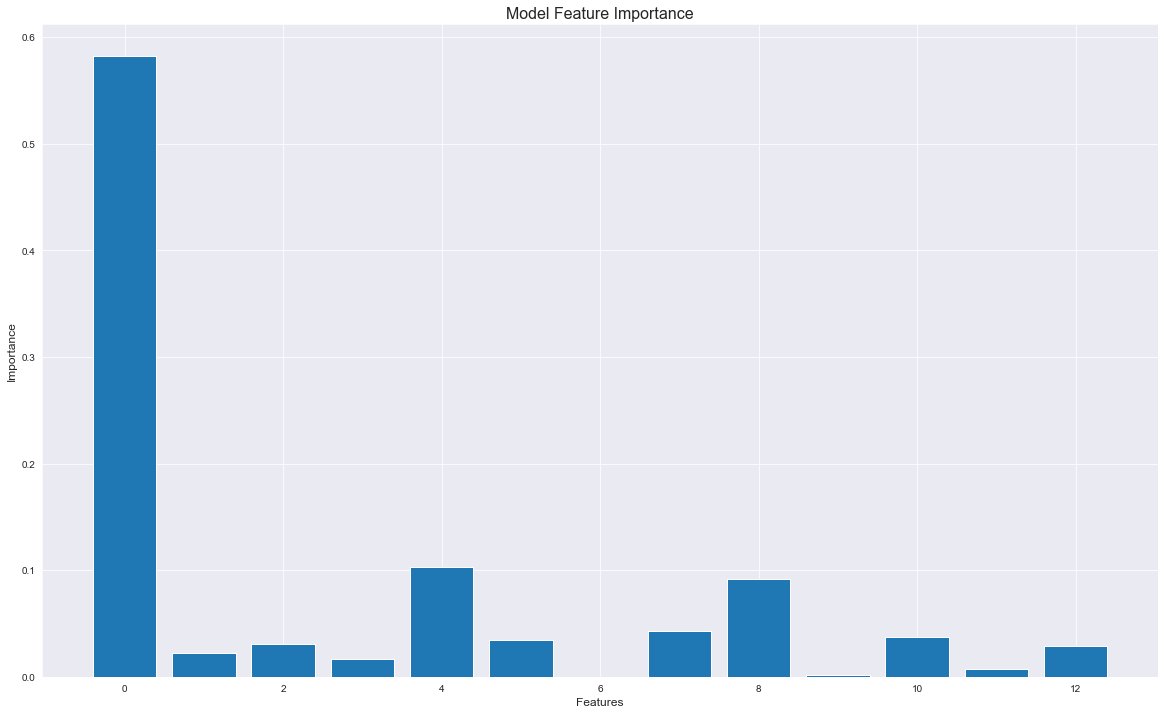

In [44]:
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,round(v,2)))
# plot feature importance
plt.figure(figsize=(20,12))
pyplot.bar([x for x in range(len(importance))], importance)
plt.title('Model Feature Importance', fontsize=16)
plt.xlabel('Features', fontsize=12)
plt.ylabel('Importance', fontsize=12)
pyplot.show()

# <b><center> Decision Tree Model </b></center> 

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")


In [46]:
# Fitting Decision Tree Regression to the dataset
from sklearn.tree import DecisionTreeRegressor
dectree_regressor = DecisionTreeRegressor(random_state=42)
dectree_regressor.fit(X_train, y_train)

#Evaluation:
y_score = dectree_regressor.predict(X_test)
print_metrics(y_test, y_score, 13)

# import export_graphviz
from sklearn.tree import export_graphviz  
 
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(dectree_regressor, out_file ='tree.dot',
               feature_names =[ 'acousticness', 'danceability', 'duration_ms', 'energy', 'explicit',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'valence']) 


Mean Square Error      = 363.9185792065889
Root Mean Square Error = 19.07665010442318
Mean Absolute Error    = 13.917647575895606
Median Absolute Error  = 11.0
R^2                    = 0.205793921605956
Adjusted R^2           = 0.20556537309418793


# <b><center>  Random Forest Model </b></center> 

In [47]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 100 decision trees
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(X_train, y_train);

# <b><center> Prediction </b></center> 

In [48]:
# Use the forest's predict method on the test data
predictions = rf.predict(X_test)
# Calculate the absolute errors
errors = abs(predictions - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Mean Absolute Error: 10.24 degrees.


# <b><center> Evaluation </b></center> 

In [49]:
y_score = rf.predict(X_test) 
print_metrics(y_test, y_score, 13)

Mean Square Error      = 180.16283895525723
Root Mean Square Error = 13.422475142657454
Mean Absolute Error    = 10.242920680584142
Median Absolute Error  = 8.25
R^2                    = 0.606817486177958
Adjusted R^2           = 0.606704340130815


In [50]:
#In this study, we brought in a Spotify dataset to analyze the relationship between popularity of a song in relation to the different variables.
#We ran a Linear Regression Model,a Random Forest Model, a Decision Tree Model and an XGBoost Model to find ways to get more insight on the dataset.
#We even tried a few different decades as music always evolves, but the best way to explain this finding is that
#although things like (Danceability, key, loudness and mode) play a factor in making a song popular along with releasing 
#a song on months like January which is the beginning of the year and May and June which are the beginning of summer, it seems 
#as marketing and having a big budget also ties into making a popular song.